In [ ]:
#import library
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
from torch.utils.data import DataLoader
from keras.datasets.mnist import load_data
sns.set_theme()

In [ ]:
#load data and normalize the data
(trainX, trainy), (testX, testy) = load_data()
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
def train(model, optimizer, loss_fct=torch.nn.NLLLoss(), nb_epochs=25):
    training_loss = []
    validation_loss = []
    for _ in tqdm(range(nb_epochs)):
        batch_loss = []
        for batch in dataset:
            x, y = batch

            log_prob = model(x.type(torch.float32).to(device).reshape(-1, 28 * 28))
            loss = loss_fct(log_prob, y.to(device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batch_loss.append(loss.item())

        training_loss.append(np.mean(batch_loss))

        # Validation
        log_prob = model(torch.from_numpy(testX).type(torch.float32).reshape(-1, 28 * 28).to(device))
        t_loss = loss_fct(log_prob, torch.from_numpy(testy).to(device))
        validation_loss.append(t_loss.item())
        model.train(True)
        model.train(True)

    return training_loss, validation_loss

In [ ]:
class ELU(nn.Module):

    def __init__(self, alpha=1.):
        super(ELU, self).__init__()
        self.alpha = alpha

    def forward(self, x):
        cond = x > 0
        y = x.clone()
        y[~cond] = self.alpha * (torch.exp(x[~cond]) - 1.)
        return y

100%|██████████| 100/100 [15:54<00:00,  9.55s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/content/Imgs/elu.png'

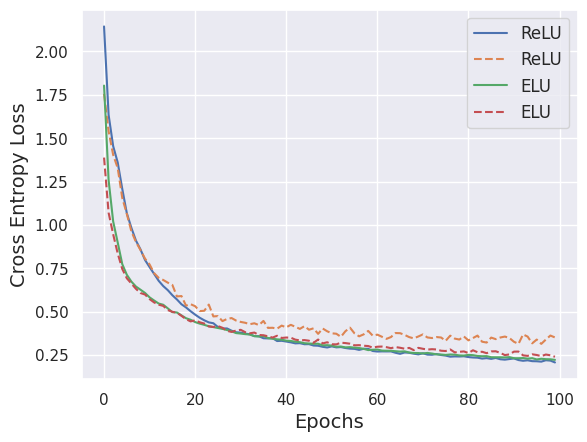

In [ ]:
if __name__ == "__main__":
    dataset = DataLoader([[trainX[i], trainy[i]] for i in range(trainX.shape[0])], batch_size=64, shuffle=True)
    testing_dataset = DataLoader([[testX[i], testy[i]] for i in range(testX.shape[0])], batch_size=64, shuffle=True)

    device = 'cuda'
    model = torch.nn.Sequential(nn.Linear(28 * 28, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), nn.ReLU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 10), nn.LogSoftmax(dim=-1)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    training_loss, validation_loss = train(model, optimizer, nb_epochs=100)
    plt.plot(training_loss, label='ReLU')
    plt.plot(validation_loss, label='ReLU', linestyle='--')

    model = torch.nn.Sequential(nn.Linear(28 * 28, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 128), ELU(), nn.Dropout(p=0.5),
                                nn.Linear(128, 10), nn.LogSoftmax(dim=-1)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    training_loss, validation_loss = train(model, optimizer, nb_epochs=100)
    plt.plot(training_loss, label='ELU')
    plt.plot(validation_loss, label='ELU', linestyle='--')

    plt.legend(fontsize=12)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Cross Entropy Loss', fontsize=14)
    plt.savefig(f'Imgs/elu.png')